# Sistema de recomendación colaborativos

Los filtros colaborativos son un tipo de modelo de recomendación que se basa en el comportamiento de los usuarios para hacer recomendaciones. El objetivo de los filtros colaborativos es encontrar usuarios con patrones de comportamiento similares y recomendar elementos que los usuarios similares hayan disfrutado previamente.


Supongamos que yo tengo un gusto similar a mi amigo Jhon en lo que ha peliculas se refiere y a los dos nos gusta Star Wars, pero Jhon ha visto The Equalizer e Inside Out, ambas peliculaes le han gustado, y yo no las he visto. Estas peliculas serían candidatas a ser recomendadas. La clave de un sistema de recomendación basado en usuarios es poder perfilar bien los gustos de los usuarios para así poder realizar las recomendaciones lo más acertadas posible.

Los filtros colaborativos se dividen en dos categorías principales: **basados en memoria y basados en modelo**.

- Sistemas basados en memoria: consiste en construit una matriz Usuario-Contenido y usar buscar usuarios similares. Aunque interesante intuitivo, este enfoque es poco escalable, puesto que cuando tienes millones de usuarios y miles de contenidos, la matriz resultante es demasiado grande.

- Sistemas de recomendación basado en modelos: estos sistemas buscan superar las limitaciones de los sistemas basados en memoria, mediante la utilización de modelos de ML como redes neuronales, redes bayesianas, modelos de clusterización, etc.


## Pros y contras de sistemas de recomendación basado en usuarios.

- Pros de sistema de recomendación basado en usuarios.

    - Puede ofrecer contenido diferente al que generalmente se consume. Volviendo a los ejemplos, el sistema de recomendación basado en usuarios es capaz de recomendar Upside Down (pelicula de animación), a pesar de que sea muy diferente a lo que usualmente suela ver (películas de ciencia ficcion).

- Contras de sistema de recomendación basado en usuarios.

    - Dificultar para recomendar contenido nuevo. Como pocas (o ninguna) persona habrá consumido dicho contenido, es dificil que un sistema de recomendación basado en usuarios recomiende un contenido nuevo.

    - Sufren del problema de cold start, es causado por la falta de información de usuarios o productos/servicios. Un sistema de recomendación sólo puede producir buenas recomendaciones después de haber acumulado suficientes datos.



## Ejemplo 

Recuerda que para poder entrenar un sistema de recomendación basado en usuarios necesitamos información sobre contenido que existe.
Y si ha cada usuario le ha gustado o no los contenidos que ha visto. Esto se suele medir mediante la valoración del usuario, «Me Gustas», etc.

Los datos de este ejemplo incluye información sobre libros, usuarios y los ratings que han dado los usuarios a dichos libros.




In [ ]:
import pandas as pd
import requests
from zipfile import ZipFile # Para descomprimir el archivo 
import shutil
import numpy as np




Mini ejercicio para descargar un archivo zip

In [ ]:
url = "http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip"
resp = requests.get(url)


In [ ]:
# Hacemos una petición get a la url 
resp = requests.get(url)

# Creamos un archivo zip con el contenido de la respuesta 
filename = url.split('/')[-1]
filename

'BX-CSV-Dump.zip'

In [ ]:
# Lo descomprimimos en la carpeta actual    
with open(filename, 'wb') as f:
  f.write(resp.content)

In [ ]:

# Descomprimimos el archivo 
with ZipFile(filename, 'r') as zip:
    # Descomprimimos el archivo en la carpeta data 
    zip.extractall('data')





In [ ]:
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep = ";", encoding='latin-1', on_bad_lines='skip')

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# EDA

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<Axes: >

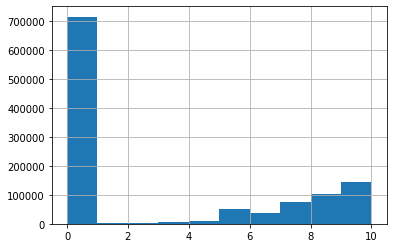

In [ ]:
ratings['Book-Rating'].hist()


Como podeos ver, parece que contamos con muchas valoraciones con el valor de 0. Aunque esto pueda parecer un error, si nos vamos al origen de los [datos](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) nos indican que las valoraciones de 0 son valoraciones que no ha hecho el usuario, sino que han extraido a partir del comportamiento del mismo.

Tras leernos la documentacion, vamos a preparar los datos para poder entrenar nuestro sistema de recomendación.

## Preparacion de datos

Vamos a quitar las valoraciones implicitas que vienen en los datos, puesto que no conocemos muy bien cómo se ha llegado a ellas y nos pueden añadir ruido al modelo.

In [ ]:
res = (ratings.query('`Book-Rating` != 0'))# query permite hacer consultas sobre el dataframe una forma bastante efectiva para filtrar 😜
res

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


<Axes: >

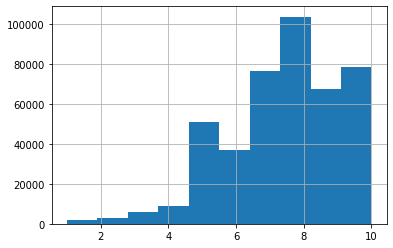

In [ ]:
res['Book-Rating'].hist()

In [ ]:
# reducimos los datos a 1000
res = res.sample(50)
res

,User-ID,ISBN,Book-Rating
641272,154888,0679774025,7
527112,127352,0385337639,7
179139,38872,3826820800,8
471867,112953,0393057240,10
580803,139913,0385316860,7
105534,24150,0399136150,8
1094936,262795,0375502238,8
71678,15263,0747550999,10
392683,94923,0451180747,7
94844,21252,0307232026,10


Ahora que tenemos los datos preparados vamos a pasar a crear nuestro sistema de recomendación basado en usuario.

## Generacion de sistema de recomendacion 

Podríamos crear nuestro sistema de recomendación de muchas maneras. En nuestro caso vamos a optar por el [análisis semántico latente o LSA](https://es.wikipedia.org/wiki/Indexaci%C3%B3n_Sem%C3%A1ntica_Latente). La idea es sencilla, se trata de descomponer la matriz varias submatrices cuyo producto de como resultado la matriz original.

Además, guardaremos algunos datos reales para comprobar el funcionamiento de  nuestro sistema de recomendación, puesto que, si funciona correctamente, los valores propuestos para nuestros datos deberían coincidir con los valores reales del modelo.

Aunque dicho así suene muy complejo, aplicarlo es muy sencillo, puesto que la librería Surprise ya cuenta con funciones específicas para este propósito. 

Pasate por la documentacion [aqui](https://surpriselib.com/) .


⚠️ La librería Surprise se centra en recomendaciones explícitas, es decir, recomendaciones dadas explícitamente por el usuario.

⚠️ los dataset de Surprise solo pueden tener 3 columnas, en el orden de usuario, item, valoración.

In [ ]:
#!pip install scikit-surprise


Lo primero que tenemos que hacer es convertir nuestro dataframe en un Dataframe de Surprise. Para ello, vamos a usar la función `load_from_df`, así como un objeto `reader` que indique la escala de las valoraciones y el orden de las columnas.

In [ ]:
from surprise import Dataset, Reader


reader = Reader(line_format='user item rating', rating_scale=(1, 5))
data = Dataset.load_from_df(res, reader)

Ahora que hemos cargado los datos, vamos a generar nuestro set de entrenamiento y vamos a entrenar nuestro sistema de recomendación. La librería Surprise cuenta con varios tipos de modelos, entre los que se encuentra SVD, que es lo mismo que el modelo LSA que hemos comentado previamente.

In [ ]:
from surprise import SVD

# generamos el conjunto de entrenamiento
data_train_surp = data.build_full_trainset()

# definimos el modelo LSA 
svd = SVD()

# entrenamos el modelo
svd.fit(data_train_surp)

Ahora que tenemos el modelo entrenado, vamos a ver qué tal funciona sobre datos nuevos. Como de costumbre, creamos el set de test y hacemos predicciones sobre dicho set.

❤️Surprise tiene funciones propias para evaluar la funcionalidad de nuestro modelo❤️

In [ ]:
from surprise import accuracy


# generamos el conjunto de test a partir del conjunto de entrenamiento 
data_test_surp = data_train_surp.build_testset() 

#data_test_surp = data_test_surp.construct_testset() 
predictions = svd.test(data_test_surp)

accuracy.rmse(predictions)

RMSE: 6.9914


6.9914233171794145

Como podemos ver, contamos con un RMSE de 3.48, que, considerando que hablamos de 1 a 5 estrellas es bastante elevado.

Para poder mejorarlo se podría (y debería) aplicar diferentes técnicas, como la optimziacion de hiperparámetros mediante Grid Search.

De hecho, surprise cuenta con la función `GridSearch` que cumple con dicho propósito, aunque no es el objetivo de este post.

En cualquier caso, veamos cómo obtener predicciones para un usuario concreto y una película concreta. Para ello, le debemos pasar una tuple con los valores id_usuario y id_contenido a nuestro sistema de recomendación.

In [ ]:
user_id = 276726
content_id = '0155061224'

svd.predict(user_id, content_id)

Prediction(uid=276726, iid='0155061224', r_ui=None, est=1.0, details={'was_impossible': False})

comportamiento del usuario 276729

In [ ]:
# obtenemos las valoraciones de los libros leidos por el usuario
ratings_pred = res.loc[res['User-ID'] == 35859]
ratings_pred

,User-ID,ISBN,Book-Rating


In [ ]:
# obtener la lista de ID de libros 
unique_ids = res['ISBN'].unique()
unique_ids

array(['0679774025', '0385337639', '3826820800', '0393057240',
       '0385316860', '0399136150', '0375502238', '0747550999',
       '0451180747', '0307232026', '0934878005', '0439136369',
       '0515087122', '0911662251', '0590353403', '0451456734',
       '0688003982', '0425153088', '3518368540', '9782702478479',
       '0786890061', '0312969120', '0373250193', '0380795566',
       '3150091519', '0671024094', '0395511224', '0517309726',
       '1558744150', '014017186X', '0451139089', '325706277X',
       '0553587692', '0618004076', '0060391685', '039304016X',
       '006101253X', '0939149613', '0786868716', '0316666343',
       '067944646X', '0439977479', '1558850767', '0874518776',
       '1583143173', '0671021001', '0345417623', '0020885709',
       '0316781266', '0441003729'], dtype=object)

In [ ]:
# obtener la lista de ID que ha visto el ID de usuario 13618 
iids1001 = res.loc[res['User-ID']==35859, 'ISBN']
iids1001

Series([], Name: ISBN, dtype: object)

In [ ]:
# eliminar las películas calificadas para las recomendaciones 
books_to_predict = np.setdiff1d(unique_ids,iids1001)
books_to_predict

array(['0020885709', '0060391685', '006101253X', '014017186X',
       '0307232026', '0312969120', '0316666343', '0316781266',
       '0345417623', '0373250193', '0375502238', '0380795566',
       '0385316860', '0385337639', '039304016X', '0393057240',
       '0395511224', '0399136150', '0425153088', '0439136369',
       '0439977479', '0441003729', '0451139089', '0451180747',
       '0451456734', '0515087122', '0517309726', '0553587692',
       '0590353403', '0618004076', '0671021001', '0671024094',
       '067944646X', '0679774025', '0688003982', '0747550999',
       '0786868716', '0786890061', '0874518776', '0911662251',
       '0934878005', '0939149613', '1558744150', '1558850767',
       '1583143173', '3150091519', '325706277X', '3518368540',
       '3826820800', '9782702478479'], dtype=object)

In [ ]:
my_recs = []
for iid in books_to_predict:
  my_recs.append((iid, svd.predict(uid=35859,iid=iid).est))
print(my_recs[-1])
pd.DataFrame(my_recs, columns=['iid', 'predictions'])['predictions'].unique()


('9782702478479', 1.0)


array([1.])